1a. Mean of X: 1.7923069652118124
1a. Std Dev of X: 1.8163368560156015
1b. Mean of Y: 10.39922548268536


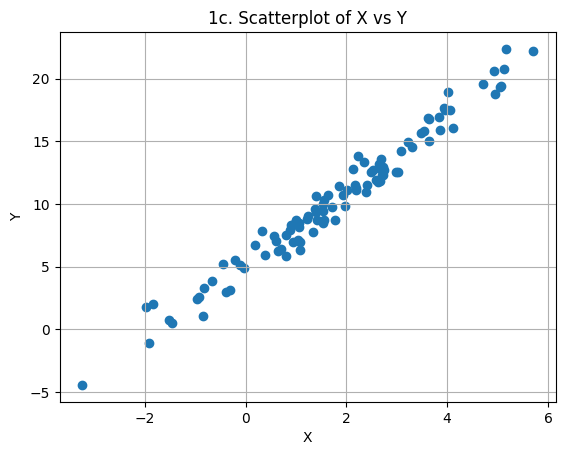

1d. Estimated Coefficient: 2.928371419864278
1d. Estimated Intercept: 5.150684990135409
1e. Residual Sum of Squares (RSS): 88.36324822912881


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import seaborn as sns

# ----------------------
# 1a. Simulate 100 values X ~ N(2, 4)
# ----------------------
np.random.seed(42)
X = np.random.normal(loc=2, scale=2, size=100)  # variance 4 => std = 2
print("1a. Mean of X:", np.mean(X))
print("1a. Std Dev of X:", np.std(X, ddof=1))

# ----------------------
# 1b. Simulate eps ~ N(0, 1) and define Y = 5 + 3X + eps
# ----------------------
eps = np.random.normal(loc=0, scale=1, size=100)
Y = 5 + 3 * X + eps
print("1b. Mean of Y:", np.mean(Y))

# ----------------------
# 1c. Plot scatterplot of X vs Y
# ----------------------
plt.figure()
plt.scatter(X, Y)
plt.title("1c. Scatterplot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# ----------------------
# 1d. Fit a linear regression model to predict Y from X
# ----------------------
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
print("1d. Estimated Coefficient:", model.coef_[0])
print("1d. Estimated Intercept:", model.intercept_)

# ----------------------
# 1e. Compute the Residual Sum of Squares (RSS)
# ----------------------
Y_hat = model.predict(X.reshape(-1, 1))
RSS = np.sum((Y - Y_hat) ** 2)
print("1e. Residual Sum of Squares (RSS):", RSS)


2a. Likelihood and Log-likelihood function in terms of β:
    L(β) = (1/β)^n * exp(-sum(t)/β)
    log L(β) = -n * log(β) - sum(t)/β
    where n = 3, sum(t) = 45

2b. Maximum Likelihood Estimate (MLE) of β:
    β_MLE = mean(t) = 15.0

2c. Log-posterior function (unnormalized):
    log P(β|t) ∝ -n*log(β) - sum(t)/β + (α−1)*log(β) − β/θ

2d. Maximum A Posteriori (MAP) Estimate of β:
    β_MAP ≈ 16.7945


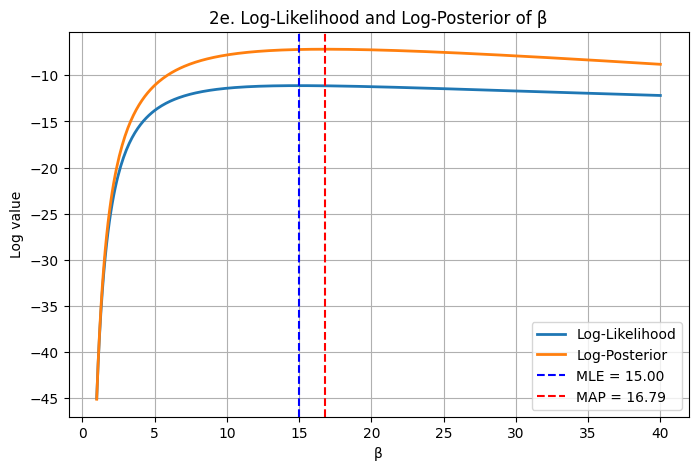

In [7]:
# ----------------------
# Problem 2 – Maximum Likelihood and MAP Estimation for Exponential Distribution
# ----------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Observed waiting times
t = np.array([15, 20, 10])
n = len(t)
sum_t = np.sum(t)

# ----------------------
# 2a. Likelihood and Log-likelihood
# ----------------------
print("2a. Likelihood and Log-likelihood function in terms of β:")
print("    L(β) = (1/β)^n * exp(-sum(t)/β)")
print("    log L(β) = -n * log(β) - sum(t)/β")
print(f"    where n = {n}, sum(t) = {sum_t}")

def log_likelihood(beta, t):
    return -n * np.log(beta) - np.sum(t) / beta

# ----------------------
# 2b. MLE of β
# ----------------------
beta_mle = np.mean(t)
print("\n2b. Maximum Likelihood Estimate (MLE) of β:")
print(f"    β_MLE = mean(t) = {beta_mle}")

# ----------------------
# 2c. Posterior distribution with Gamma prior
# Prior: Gamma(α = 3, θ = 10)
# Posterior (unnormalized):
#    log P(β|t) ∝ log L(β) + log prior
#               ∝ -n*log(β) - sum(t)/β + (α−1)*log(β) − β/θ
# ----------------------

alpha = 3
theta = 10

print("\n2c. Log-posterior function (unnormalized):")
print("    log P(β|t) ∝ -n*log(β) - sum(t)/β + (α−1)*log(β) − β/θ")

def log_posterior(beta, t, alpha, theta):
    return log_likelihood(beta, t) + (alpha - 1) * np.log(beta) - beta / theta

# ----------------------
# 2d. MAP estimate: maximize log-posterior
# ----------------------
neg_log_posterior = lambda beta: -log_posterior(beta, t, alpha, theta)
res = minimize_scalar(neg_log_posterior, bounds=(0.01, 100), method='bounded')
beta_map = res.x
print("\n2d. Maximum A Posteriori (MAP) Estimate of β:")
print(f"    β_MAP ≈ {beta_map:.4f}")

# ----------------------
# 2e. Plot log-likelihood and log-posterior
# ----------------------
beta_vals = np.linspace(1, 40, 400)
logL_vals = [log_likelihood(b, t) for b in beta_vals]
logP_vals = [log_posterior(b, t, alpha, theta) for b in beta_vals]

plt.figure(figsize=(8, 5))
plt.plot(beta_vals, logL_vals, label='Log-Likelihood', lw=2)
plt.plot(beta_vals, logP_vals, label='Log-Posterior', lw=2)
plt.axvline(beta_mle, color='blue', linestyle='--', label=f"MLE = {beta_mle:.2f}")
plt.axvline(beta_map, color='red', linestyle='--', label=f"MAP = {beta_map:.2f}")
plt.title("2e. Log-Likelihood and Log-Posterior of β")
plt.xlabel("β")
plt.ylabel("Log value")
plt.legend()
plt.grid(True)
plt.show()


3a. Total samples: 1797
3a. Number of '3's: 183
3a. Number of not-'3's: 1614


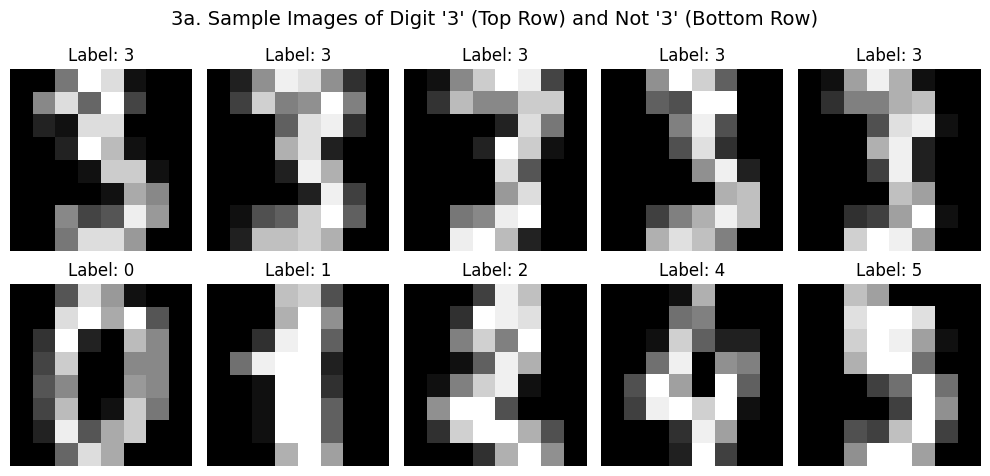

3b. Training set size: 1257
3b. Test set size: 540
3c. Logistic regression model fitted.
3d. Test Accuracy: 0.9796296296296296
3e. Confusion Matrix:
[[479   7]
 [  4  50]]


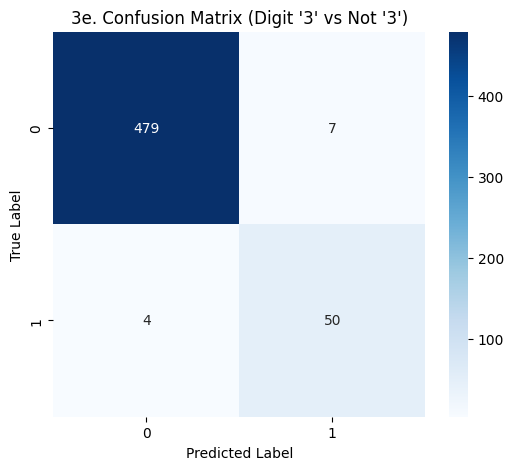

In [9]:
# ----------------------
# Problem 3 – Logistic Regression with Digits Dataset
# ----------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# ----------------------
# 3a. Load digits dataset and create binary labels (is 3 or not)
# ----------------------
digits = load_digits()
X_d = digits.data
y_d = (digits.target == 3).astype(int)  # 1 if digit is '3', 0 otherwise

print("3a. Total samples:", len(X_d))
print("3a. Number of '3's:", np.sum(y_d))
print("3a. Number of not-'3's:", len(y_d) - np.sum(y_d))

# Visualize sample images of '3' and not '3'
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("3a. Sample Images of Digit '3' (Top Row) and Not '3' (Bottom Row)", fontsize=14)

# Top row: show 5 examples of '3'
three_indices = np.where(y_d == 1)[0][:5]
for ax, idx in zip(axes[0], three_indices):
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_title("Label: 3")
    ax.axis('off')

# Bottom row: show 5 examples of not '3'
not_three_indices = np.where(y_d == 0)[0][:5]
for ax, idx in zip(axes[1], not_three_indices):
    ax.imshow(digits.images[idx], cmap='gray')
    ax.set_title(f"Label: {digits.target[idx]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# ----------------------
# 3b. Split into training and test sets
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.3, random_state=42)
print("3b. Training set size:", len(X_train))
print("3b. Test set size:", len(X_test))

# ----------------------
# 3c. Fit logistic regression model
# ----------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
print("3c. Logistic regression model fitted.")

# ----------------------
# 3d. Predict and report accuracy
# ----------------------
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("3d. Test Accuracy:", acc)

# ----------------------
# 3e. Plot confusion matrix as heatmap
# ----------------------
cm = confusion_matrix(y_test, y_pred)
print("3e. Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("3e. Confusion Matrix (Digit '3' vs Not '3')")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
